# Mini Projet : mouvement rétrograde de Mars



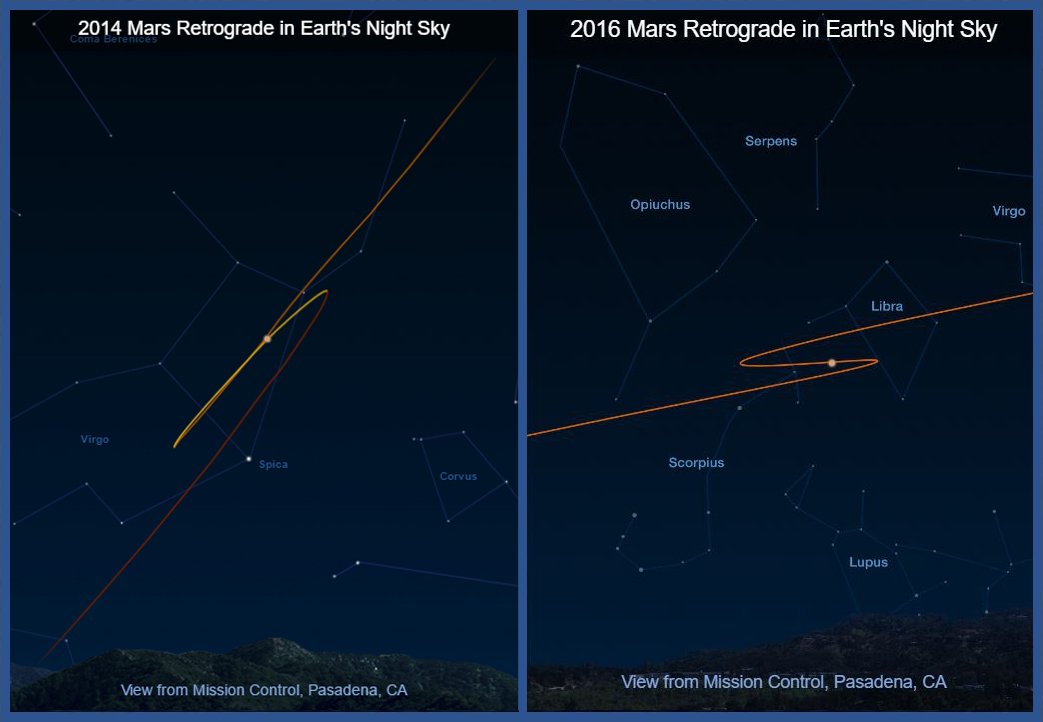

*image from https://mars.nasa.gov/all-about-mars/night-sky/retrograde/*

Tous les deux ans, si l'on regarde la position de Mars depuis la Terre par rapport à la voute céleste, la planète rouge semble faire un bref demi-tour, avant de repartir dans le même sens. Ce mouvement rétrograde est observé depuis l'antiquité.

Le but de ce mini-projet est de construire un modèle reproduisant ce phénomène.

## A la maison

Rappelez les équations du mouvement $X(t),Y(t)$ pour un mouvement circulaire uniforme de rayon $R$, de période $T$ et de phase à l'origine $\phi$. 

Dans quelle direction (quel angle par rapport à la direction de l'axe $X$) pointe l'objet à la date $t=0$ ?

## Données

Le fichier DataMars.csv contient les coordonnées (longitude et latitude) de la position de Mars par rapport au centre de la Terre en fonction de la date entre 2015 et 2017. Notons que la latitude est définie ici par rapport au plan de l'écliptique. 

Le centre de la "boucle" peut s'observer à la date du 25 mai 2016, à la longitude de 240.5°.



>**NOTE**  
>Pour lire fichier csv, on peut utiliser la fonction read_csv du module Pandas, en utilisant l' option comment='#'


*(DataMars.csv a été construit à partir des données de http://vo.imcce.fr/webservices/miriade/?forms)*


## Modèle

Vous allez utiliser un modèle bidimensionnel du mouvement de la Terre et de Mars autour du Soleil. On considérera le mouvement des deux planètes comme circulaire uniforme et contenu dans le plan de l'écliptique.

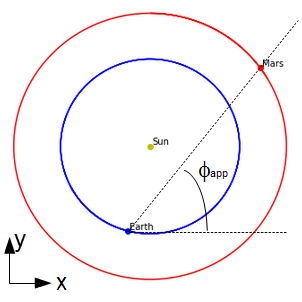

Ce modèle vous permettra de calculer la longitude de Mars vue depuis la Terre (i.e. l'angle $\phi_{app}$ dans le réferentiel géocentrique) en fonction du temps.

>**NOTE**  
>La fonction numpy.arctan(y/x) donnant un résultat entre $-\pi/2$ et $\pi/2$, nous vous conseillons de lui préférer la fonction numpy.arctan2(y,x) qui donne un résultat entre $-\pi$ et $\pi$.

Vous pourrez ensuite comparez le modèle (longitude calculée) aux données astronomiques (longitude mesurée).

>**INDICE**  
>Le mouvement rétrograde apparent s'observe quand, dans le réferentiel héliocentrique, la Terre "dépasse" Mars. Au "milieu" du mouvement rétrograde la Terre et Mars sont donc dans la même direction par rapport au Soleil (Soleil, Terre et Mars sont alignés). En choisissant judiciseusement la date $t=0$ et la phase à l'origine pour les deux planètes, on peut faire coincider le modèle aux données à cet instant.


### Grandeurs utiles:

Rayon de l'orbite de la Terre : 1 UA  
Période de révolution de la Terre : 365.256 jours  
Rayon de l'orbite de Mars : 1.52371 UA  
Période de révolution de Mars : 686.885 jours


## Méthodes

Vous allez utiliser une représentation graphique pour illustrer votre modèle. Pour cela, il faut représenter sur un graphique à la fois les données et le modèle. Vous prendrez un soin particulier pour que le graphique soit lisible et compréhensible.

Voici un exemple de représentation graphique :

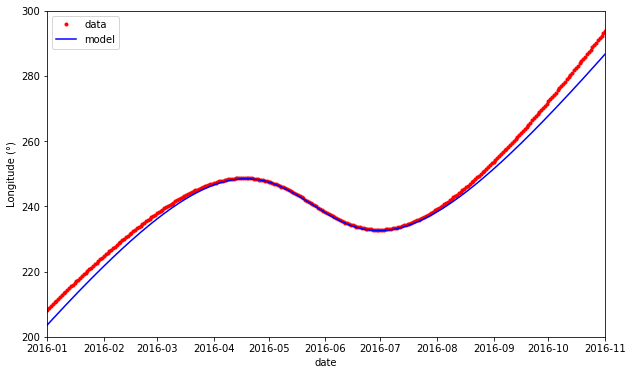

## Compte-rendu

Vous rendrez un compte-rendu sous la forme d’un Jupyter Notebook (et d’une partie rédigée à la main si vous le souhaitez). Vous apporterez un soin particulier à la rédaction, à l’explication de la résolution du problème, et à l’explication du script (code commenté). Pour cela, vous ferez différentes sections et vous utiliserez des cellules de texte dans le notebook. Voici un exemple de cellule de texte :
```
# Section 1
## Sous-section 1
Du texte
- une liste

une formule latex $k=2$
```

Vous trouverez un formulaire détaillé du formatage des cellules de texte ici. https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#lines

Vous rendrez votre compte-rendu dans l’activité devoir correspondante de Moodle.

# Réponse !

## Le modèle

Bien entendu le modèle proposé dans l'énnoncé est celui du mouvement circulaire uniforme de période $T$ et de rayon $R$ dont les équations horaires sont :

$$
X(t) = R*cos(2\pi t/T + \phi)\\
Y(t) = R*sin(2\pi t/T + \phi)
$$

où $\phi$ est le déphasage à l'origine. D'après ces équations on sait que à l'origine des temps ($t=0$) l'objet pointera dans la direction faisant un angle $\phi$ avec l'axe des $x$.

## Importation des données

On utilise ici la librairie pandas pour importer le fichier de données. On aurait aussi pu utiliser numpy.


In [1]:
#usual suspects

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#getting data

dataMars=pd.read_csv("DataMars.csv", delimiter=',', index_col=0, comment='#')
print(dataMars.head(n=3))

              Date Longitude (d:m:s)  Longitude (decimal) Latitude (d:m:s)  \
Target                                                                       
Mars    2015-03-01      6 41 13.6229             6.687117   -00 29 17.9130   
Mars    2015-03-02       7 27 2.2465             7.450624   -00 28 35.5370   
Mars    2015-03-03      8 12 48.4061             8.213446   -00 27 53.1443   

        Latitude (decimal)  
Target                      
Mars             -0.488309  
Mars             -0.476538  
Mars             -0.464762  


Dans ce fichier on constate qu'il y a une colonne Date, deux colonnes pour la longitude (une en degré minutes secondes, et une convertie en décimales), et 2 colonnes pour la latitude (idem). Nous n'allons garder ici que les colonnes de la longitude et de la latitude en degrés décimales, ainsi que la date au format datetime64, le tout dans des array numpy. (Notons que garder la latitude sera superflu par rapport au modèle 2D proposé).

On peut ainsi ploter la longitude et la latitude mesurées en fonction de la date, ainsi que la latitude en fonction de la longitude (pour le plaisir).

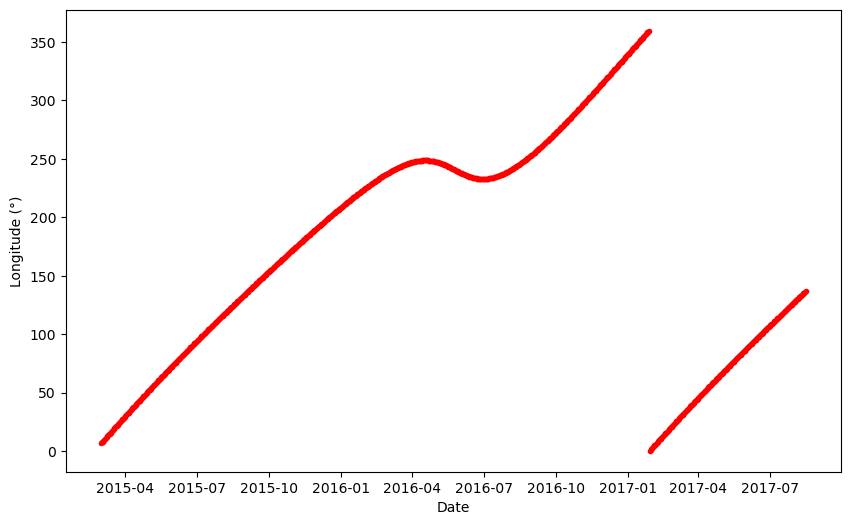

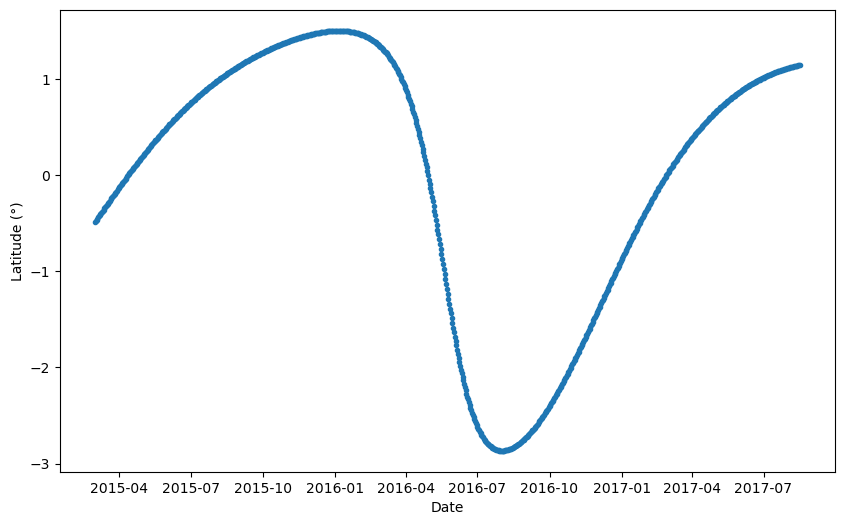

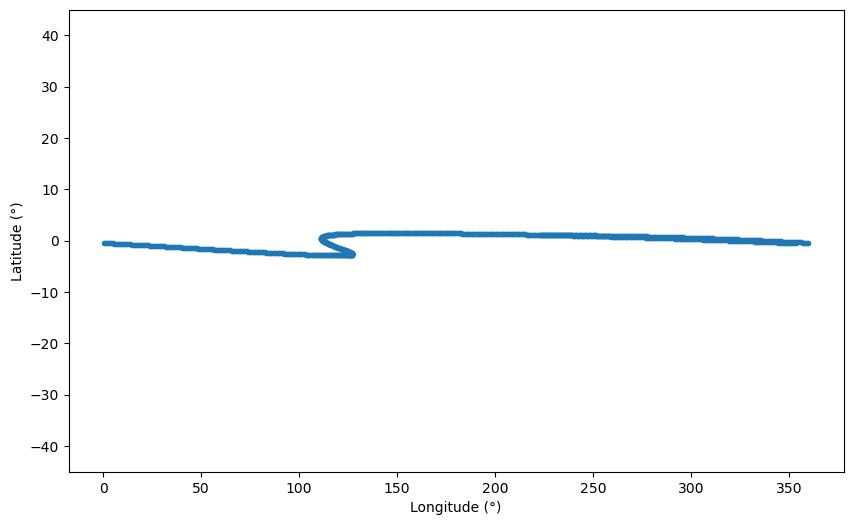

In [3]:
#numpy conversion

longitude=np.array(dataMars['Longitude (decimal)'])
latitude=np.array(dataMars['Latitude (decimal)'])
date=np.array(dataMars['Date'],dtype = 'datetime64[D]')

#plots
plt.figure(figsize=(10, 6))
plt.plot(date,longitude,'.r')
plt.xlabel('Date')
plt.ylabel('Longitude (°)')
plt.show()
#plots
plt.figure(figsize=(10, 6))
plt.plot(date,latitude,".")
plt.xlabel('Date')
plt.ylabel('Latitude (°)')
plt.show()
#plots
plt.figure(figsize=(10, 6))
plt.plot(360-longitude,latitude,".")
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')
plt.ylim(-45,45)
plt.show()

On remarque que la longitude est globalement croissante, sauf entre avril et juillet 2016. Cela correspond au mouvement rétrograde que nous cherchons à modéliser !

## Programmation du modèle

Nous allons maintenant programmer le modèle. Comme c'est un modèle simplifié en 2D, on ne calculera que la longitude. 


### Equations horaires

On calcule d'abord $X(t)$ et $Y(t)$ pour chaques planètes avec les formules décrites plus haut. 

On prendra ici un intervalle de temps centré en zéro ! On pourrait bien sur prendre un intervalle de temps allant de 0 à 800 jours... mais comme on peut choisir QUAND est notre temps 0, on peut aussi choisir que ce temps 0 soit au milieu de l'intervalle que l'on regarde.

On prendra pour commencer une phase à l'origine $\phi=0$ pour les deux planètes.

Puis on peut ploter les trajectoires en 2D dans le plan $X,Y$.

In [4]:
#calculating coordinates in the model

#Constants
Rterre=1 #AU
Rmars=1.52371 #AU
Tterre=365.256 #days
Tmars=686.885 #days

days=np.arange(-400,400,1) #time axis in days centered around zero

Phi=0 # we start with 0 for now...
RAD=np.pi/180 #pi/180

#Earth Coordinates
Xterre=Rterre*np.cos(2*np.pi*days/Tterre+RAD*Phi)
Yterre=Rterre*np.sin(2*np.pi*days/Tterre+RAD*Phi)
#Mars Coordinates
Xmars=Rmars*np.cos(2*np.pi*days/Tmars+RAD*Phi)
Ymars=Rmars*np.sin(2*np.pi*days/Tmars+RAD*Phi)

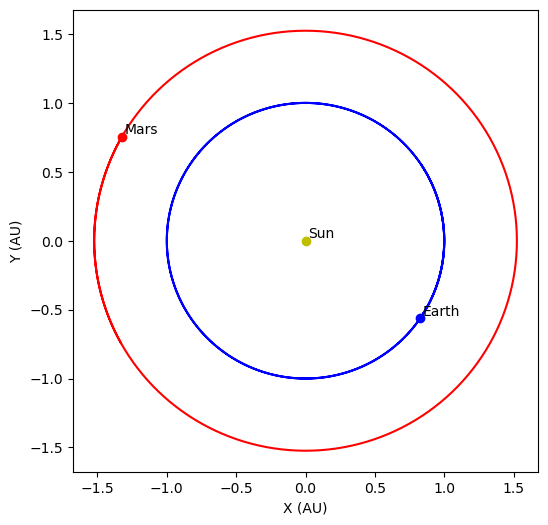

In [5]:
#Plots
plt.figure(figsize=(6, 6))
plt.plot(Xterre,Yterre,'b')
plt.plot(Xmars,Ymars,'r')
#plotting 1 point on each and the sun to make it pretty
plt.plot(Xterre[0],Yterre[0],'ob')
plt.text(Xterre[0]+0.02,Yterre[0]+0.02,'Earth')
plt.plot(Xmars[0],Ymars[0],'or')
plt.text(Xmars[0]+0.02,Ymars[0]+0.02,'Mars')
plt.plot(0,0,'oy')
plt.text(0.02,0.02,'Sun')
plt.xlabel('X (AU)')
plt.ylabel('Y (AU)')
plt.show()

### Longitude apparente modélisée

On peut ensuite utilisé la fonction atan2 de numpy pour calculer la longitude apparente de Mars par rapport à la Terre, que l'on converti en degré et on plote le résultat en fonction du temps.

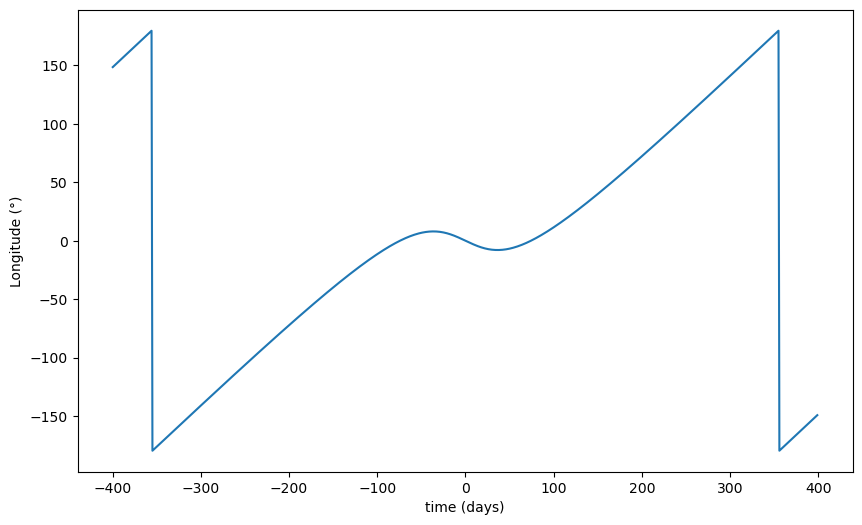

In [6]:
#calculating apparent longitude from earth POV using arctan2

Phi_app=np.arctan2((Ymars-Yterre),(Xmars-Xterre))*180/np.pi #result between -180 and 180

#plots
plt.figure(figsize=(10, 6))
plt.plot(days,Phi_app,'-')
plt.xlabel('time (days)')
plt.ylabel('Longitude (°)')
plt.show()

On constate ici que nous obtenons une courbe similaire à la courbe de longitude apparente mesurée plotée plus haut. 

On constate également que le "centre" du mouvement rétrograde se trouve à l'angle apparent 0, à la date t=0. En plotant le système à cette date il est facile de se rendre compte que le centre du mouvement rétrograde apparait quand les trois asrtes sont alignés !


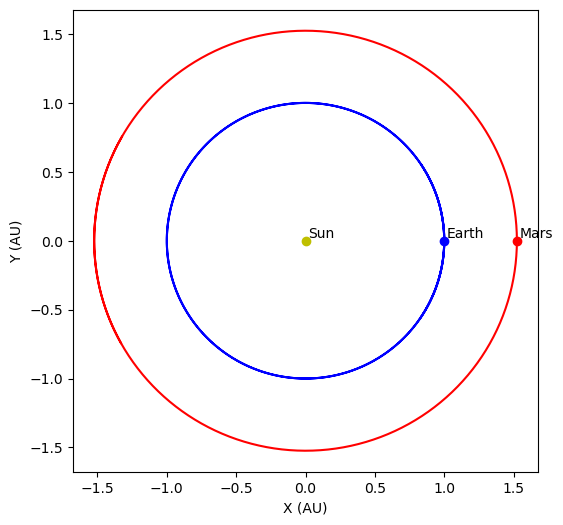

In [7]:
i=np.where(days==0)
#Plots
plt.figure(figsize=(6, 6))
plt.plot(Xterre,Yterre,'b')
plt.plot(Xmars,Ymars,'r')
#plotting 1 point on each and the sun to make it pretty
plt.plot(Xterre[i],Yterre[i],'ob')
plt.text(Xterre[i]+0.02,Yterre[i]+0.02,'Earth')
plt.plot(Xmars[i],Ymars[i],'or')
plt.text(Xmars[i]+0.02,Ymars[i]+0.02,'Mars')
plt.plot(0,0,'oy')
plt.text(0.02,0.02,'Sun')
plt.xlabel('X (AU)')
plt.ylabel('Y (AU)')
plt.show()

## Comparaison Données vs. Modèle

Pour comparer le modèle aux données il faut régler deux problèmes : choisir à quelle date correspond le jour 0, et qu'elle est la phase à l'origine correspondante.

La solution la plus efficace est de suivre directement les données de l'énnoncé : on SAIT qu'à la date 2016-05-25 les deux astres sont alignés (ie ont la meme longitude par rapport au soleil...) dans la direction 240.5°. 

On choisit donc $t=0$ correspond à la date du 2016-05-25 et la phase à l'origine $\phi=240.5$.

Après avoir recalculé les coordonnées des 2 planètes et la longitude apparente (que l'on ramène entre 0 et 360°) on plote les données et le modèle sur un même graphe.

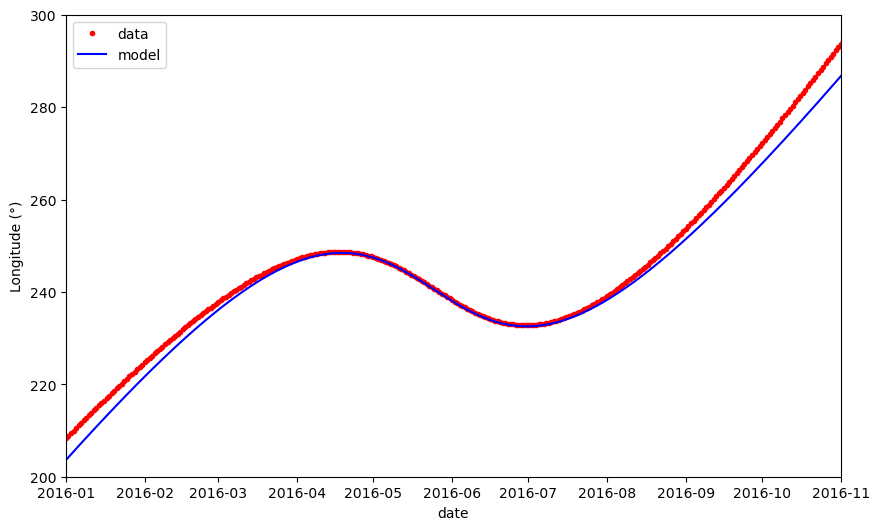

In [8]:
Phi=240.5 # given in text

#Earth Coordinates
Xterre=Rterre*np.cos(2*np.pi*days/Tterre+RAD*Phi)
Yterre=Rterre*np.sin(2*np.pi*days/Tterre+RAD*Phi)
#Mars Coordinates
Xmars=Rmars*np.cos(2*np.pi*days/Tmars+RAD*Phi)
Ymars=Rmars*np.sin(2*np.pi*days/Tmars+RAD*Phi)

Phi_app=np.arctan2((Ymars-Yterre),(Xmars-Xterre))*180/np.pi #result between -180 and 180

Phi_app[Phi_app<0]+=360 #result between 0 and 360

#we create here a np.array in format datetime64 from the days arrays
#to compare model and data we set day 0 to 2016-05-25
daysdt=np.datetime64('2016-05-25')+np.array(days,dtype = 'timedelta64[D]')

#plots
plt.figure(figsize=(10, 6))
plt.plot(date,longitude,'.r',label='data')
plt.plot(daysdt,Phi_app,'-b',label='model')
plt.xlabel('date')
plt.ylabel('Longitude (°)')
plt.xlim(np.datetime64('2016-01-01'),np.datetime64('2016-11-01'))
plt.ylim(200,300)
plt.legend()
plt.show()

### Commentaires et conclusion

ça reste pas mal pour un modèle 2D... l'accord est très bon pendant quelques mois autour de la date centrale mais on voit quand même bien les limites du modèle !

Deux pistes peuvent être envisagées pour améliorer le modèle

- la forme elliptique des orbites

- l'inclinaison du plan de rotation de Mars par rapport à la Terre.

Ces deux pistes pourraient être envisagées mais complexifient grandement le modèle. En effet, il ne suffit pas de connaitre l'excentricité des ellipses mais aussi la direction du grand axe de chacune. De même, il ne suffit pas de connaitre l'inclinaison du plan de Mars, mais aussi dans quelle direction il coupe le plan de la Terre.

## Bonus visuel

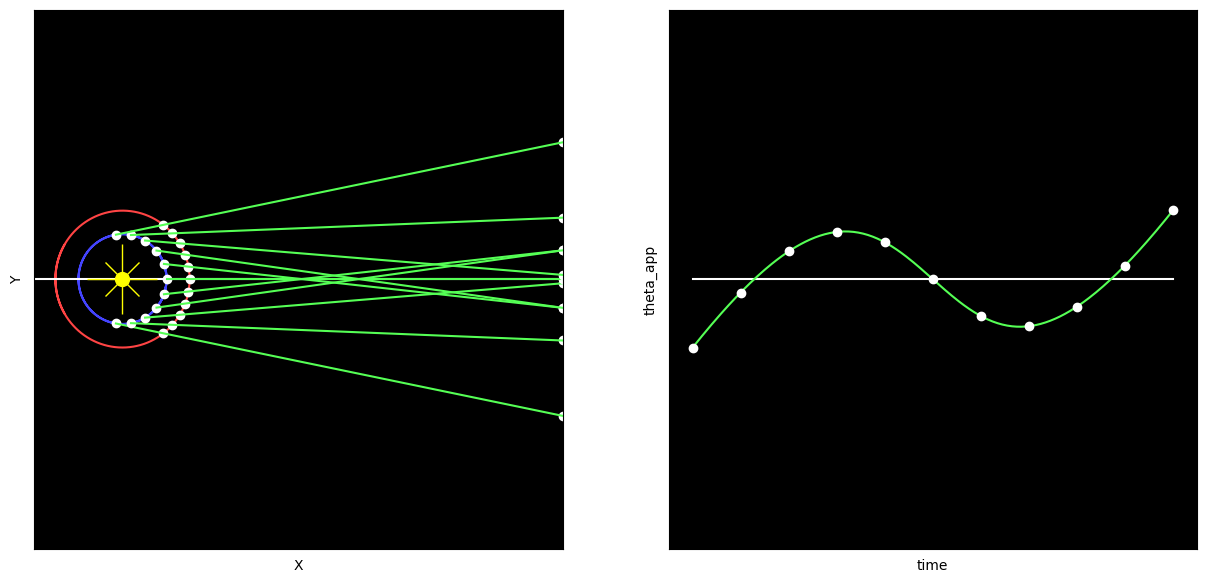

In [9]:
days=np.arange(-400,401,1) #time axis in days centered around zero

Phi=0 # we start with 0 for now...
RAD=np.pi/180 #pi/180

#Earth Coordinates
Xterre=Rterre*np.cos(2*np.pi*days/Tterre+RAD*Phi)
Yterre=Rterre*np.sin(2*np.pi*days/Tterre+RAD*Phi)
#Mars Coordinates
Xmars=Rmars*np.cos(2*np.pi*days/Tmars+RAD*Phi)
Ymars=Rmars*np.sin(2*np.pi*days/Tmars+RAD*Phi)

ndays=len(days)

yapp=[]
thetapp=[]
xapp=np.arange(ndays//2-100,ndays//2+101,1)
xapp2=[]
yapp2=[]
thetapp2=[]
fig,ax=plt.subplots(1,2,figsize=[15,7])
ax[0].plot(Xterre,Yterre,'#4444ff')
ax[0].plot(Xmars,Ymars,'#ff4444')
ax[0].plot([-2,10],[0,0],'-',color="white")
ax[0].plot([0],[0],'+',color='yellow',markersize=50.0)
ax[0].plot([0],[0],'x',color='yellow',markersize=25.0)
ax[0].plot([0],[0],'o',color='yellow',markersize=10.0)
ax[0].set_xlim(-2,10)
ax[0].set_ylim(-6,6)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].set_facecolor('#000000')
for ld in xapp:
    thetapp.append(np.arctan2(Ymars[ld]-Yterre[ld],Xmars[ld]-Xterre[ld])*180/np.pi)
    if Xmars[ld]!=Xterre[ld]:
        xline=np.linspace(Xterre[ld],10,10)
        yline=Yterre[ld]+((Ymars[ld]-Yterre[ld])/(Xmars[ld]-Xterre[ld]))*(xline-Xterre[ld])
        yapp.append(yline[-1])
    if ld%20==0:
        ax[0].plot([Xmars[ld],Xterre[ld],10],[Ymars[ld],Yterre[ld],yline[-1]],'o',color='white')
        ax[0].plot(xline,yline,'#55ff55')
        xapp2.append(ld)
        yapp2.append(yline[-1])
        thetapp2.append(thetapp[-1])


ax[1].plot(xapp,0*np.array(xapp),'-',color="white")
ax[1].plot(xapp,thetapp,'#55ff55')    
ax[1].plot(xapp2,thetapp2,'o',color='white') 
ax[1].set_ylim(-45,45)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xlabel('time')
ax[1].set_ylabel('theta_app')
ax[1].set_facecolor('#000000')
plt.show()

## TEST Excentricité et Mouvement hors du plan

Mouvement elliptique des planètes. Les angles Phimars et Phiterre représentent la direction du grand axe de  l'ellispse

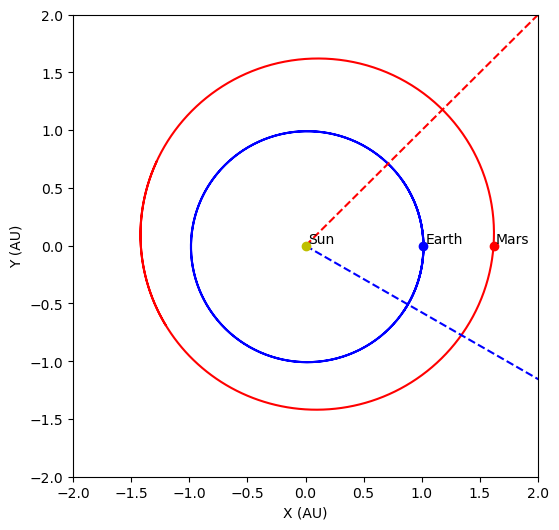

In [10]:
Amars=1.52371
Aphemars=1.66602
Perimars=1.3814
Phimars=45

Aterre=1.000
Apheterre=1.01671
Periterre=0.98329
Phiterre=-30

Cmars=(Aphemars-Perimars)/2
Cterre=(Apheterre-Periterre)/2

Phi=0

#Earth Coordinates
Rterre=(Aterre-Cterre)*(Aterre+Cterre)/(Aterre-Cterre*np.cos(2*np.pi*days/Tterre+RAD*(Phi-Phiterre)))
Xterre=Rterre*np.cos(2*np.pi*days/Tterre+RAD*Phi)
Yterre=Rterre*np.sin(2*np.pi*days/Tterre+RAD*Phi)
#Mars Coordinates
Rmars=(Amars-Cmars)*(Amars+Cmars)/(Amars-Cmars*np.cos(2*np.pi*days/Tmars+RAD*(Phi-Phimars)))
Xmars=Rmars*np.cos(2*np.pi*days/Tmars+RAD*Phi)
Ymars=Rmars*np.sin(2*np.pi*days/Tmars+RAD*Phi)

#Plots
plt.figure(figsize=(6, 6))
plt.plot(Xterre,Yterre,'b')
plt.plot(Xmars,Ymars,'r')
#plotting 1 point on each and the sun to make it pretty

i=np.where(days==0)[0]
plt.plot(Xterre[i],Yterre[i],'ob')
plt.text(Xterre[i]+0.02,Yterre[i]+0.02,'Earth')
plt.plot(Xmars[i],Ymars[i],'or')
plt.text(Xmars[i]+0.02,Ymars[i]+0.02,'Mars')
plt.plot([0,3*np.cos(Phimars*RAD)],[0,3*np.sin(Phimars*RAD)],'--r')
plt.plot([0,3*np.cos(Phiterre*RAD)],[0,3*np.sin(Phiterre*RAD)],'--b')
plt.plot(0,0,'oy')
plt.text(0.02,0.02,'Sun')
plt.xlabel('X (AU)')
plt.ylabel('Y (AU)')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()

In [11]:
np.max(np.sqrt(Xmars**2+Ymars**2))

1.6660198605149958

Rotation du plan du mouvement de mars = Combinaison d'une rotation suivant x et d'une rotation suivant y

1.4079967631005075


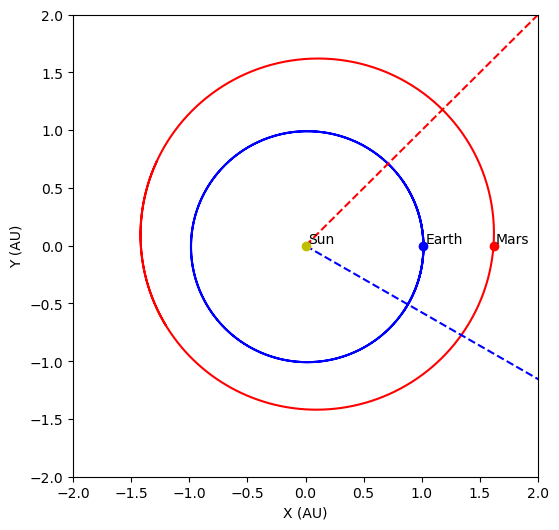

In [12]:
xangle=1.0
yangle=1.0

RX=np.array([[1.0, 0.0, 0.0],
             [0.0, np.cos(xangle*RAD),-np.sin(xangle*RAD)],
             [0.0, np.sin(xangle*RAD), np.cos(xangle*RAD)]])

RY=np.array([[np.cos(yangle*RAD),0.0,np.sin(yangle*RAD)],
             [0.0, 1.0, 0.0],
             [-np.sin(yangle*RAD),0.0, np.cos(yangle*RAD)]])

Coordmars=np.dot(np.array([Xmars,Ymars,0*Xmars]).transpose(),np.dot(RX,RY))
print(np.arcsin(np.max(Coordmars[:,2])/Amars)/RAD)

#Plots
plt.figure(figsize=(6, 6))
plt.plot(Xterre,Yterre,'b')
plt.plot(Coordmars[:,0],Coordmars[:,1],'r')
#plotting 1 point on each and the sun to make it pretty

i=np.where(days==0)
plt.plot(Xterre[i],Yterre[i],'ob')
plt.text(Xterre[i]+0.02,Yterre[i]+0.02,'Earth')
plt.plot(Coordmars[i,0],Coordmars[i,1],'or')
plt.text(Coordmars[i,0]+0.02,Coordmars[i,1]+0.02,'Mars')
plt.plot([0,3*np.cos(Phimars*RAD)],[0,3*np.sin(Phimars*RAD)],'--r')
plt.plot([0,3*np.cos(Phiterre*RAD)],[0,3*np.sin(Phiterre*RAD)],'--b')
plt.plot(0,0,'oy')
plt.text(0.02,0.02,'Sun')
plt.xlabel('X (AU)')
plt.ylabel('Y (AU)')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()


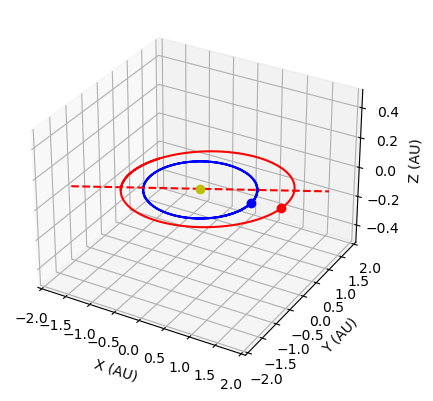

In [13]:
ax = plt.figure().add_subplot(projection='3d')

i=np.where(days==0)[0]

ax.plot(Xterre,Yterre,0*Xterre,'-b')
ax.plot(Xterre[i],Yterre[i],0,'ob')
ax.plot(Coordmars[i,0],Coordmars[i,1],Coordmars[i,2],'or')
ax.plot(Coordmars[:,0],Coordmars[:,1],Coordmars[:,2],'-r')
ax.plot(np.linspace(-2,2,10),np.linspace(-2,2,10)*np.cos(Phimars),0*np.linspace(-2,2,10),'--r')
ax.plot(0,0,0,'oy')
ax.set_xlabel('X (AU)')
ax.set_ylabel('Y (AU)')
ax.set_zlabel('Z (AU)')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_zlim(-0.5,0.5)
plt.show()

On crée une fonction qui calcule les orbites à partir des angles des ellipse et de rotaiton du plan de mars

In [14]:
def Orbits(angles):
    #angles=[Phiterre,Phimars,xangle,yangle]
    days=np.arange(-200,201,1)
    RAD=np.pi/180.0
    
    Aterre=1.000
    Apheterre=1.01671
    Periterre=0.98329
    Phiterre=angles[0]
    
    Amars=1.52371
    Aphemars=1.66602
    Perimars=1.3814
    Phimars=angles[1]



    Cmars=(Aphemars-Perimars)/2
    Cterre=(Apheterre-Periterre)/2
    
    Phi=angles[4]
    #Phi=240.5

    #Earth Coordinates
    Rterre=(Aterre-Cterre)*(Aterre+Cterre)/(Aterre-Cterre*np.cos(2*np.pi*days/Tterre+RAD*(Phi-Phiterre)))
    Xterre=Rterre*np.cos(2*np.pi*days/Tterre+RAD*Phi)
    Yterre=Rterre*np.sin(2*np.pi*days/Tterre+RAD*Phi)
    #Mars Coordinates
    Rmars=(Amars-Cmars)*(Amars+Cmars)/(Amars-Cmars*np.cos(2*np.pi*days/Tmars+RAD*(Phi-Phimars)))
    Xmars=Rmars*np.cos(2*np.pi*days/Tmars+RAD*Phi)
    Ymars=Rmars*np.sin(2*np.pi*days/Tmars+RAD*Phi)
    
    #incl=1.85
    xangle=angles[2]
    yangle=angles[3]

    RX=np.array([[1.0, 0.0, 0.0],
                 [0.0, np.cos(xangle*RAD),-np.sin(xangle*RAD)],
                 [0.0, np.sin(xangle*RAD), np.cos(xangle*RAD)]])

    RY=np.array([[np.cos(yangle*RAD),0.0,np.sin(yangle*RAD)],
                 [0.0, 1.0, 0.0],
                 [-np.sin(yangle*RAD),0.0, np.cos(yangle*RAD)]])

    Coordmars=np.dot(np.array([Xmars,Ymars,0*Xmars]).transpose(),np.dot(RX,RY))
    
    calclong=(np.arctan2((Coordmars[:,1]-Yterre),(Coordmars[:,0]-Xterre))/RAD + 360)%360
    calclatt=np.arctan2((Coordmars[:,2]-0.0),np.sqrt((Coordmars[:,0]-Xterre)**2+(Coordmars[:,1]-Yterre)**2))/RAD
    
    return days, calclong, calclatt
    
    
    

In [15]:
days,calclong,calclatt=Orbits([0.0,0.0,-1,2,240.5])

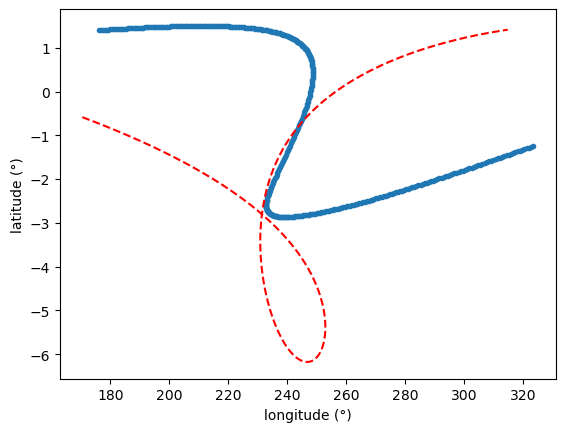

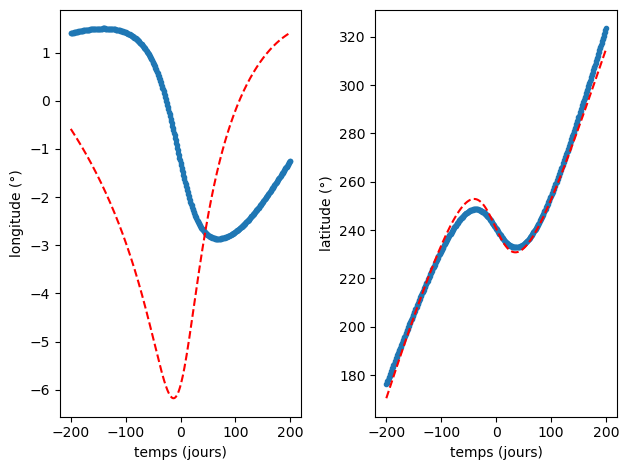

In [16]:
datenum=date-np.datetime64('2016-05-25')
datenum=datenum.astype(int)
mask1=datenum>=days[0]
mask2=datenum<=days[-1]
mask=mask1*mask2
plt.plot(longitude[mask],latitude[mask],".")
plt.plot(calclong,calclatt,'--r')
plt.xlabel("longitude (°)")
plt.ylabel("latitude (°)")
plt.show()
fig, axs=plt.subplots(1,2)
axs[0].plot(datenum[mask],latitude[mask],'.')
axs[0].plot(days,calclatt,"--r")
axs[0].set_xlabel("temps (jours)")
axs[0].set_ylabel("longitude (°)")              
axs[1].plot(datenum[mask],longitude[mask],'.')
axs[1].plot(days,calclong,"--r")
axs[1].set_xlabel("temps (jours)")
axs[1].set_ylabel("latitude (°)")
plt.tight_layout()
plt.show()

On va essayer d'optimiser les angles pour que le modèle colle aux observations en minimisant l'erreur quadratique

In [17]:
errsq=np.sum((longitude[mask]-calclong)**2+(latitude[mask]-calclatt)**2)

In [18]:
def opti(data,params0,errorfunction,itr):
    """
    stupid optimization procedure
    """
    params=params0[:]
    err0=errorfunction(data,params)
    for k in range(itr):
        tparams=params[:]
        for i in range(len(params)):
            nparams=params
            nparams[i]=1.00001*nparams[i]
            err1=errorfunction(data,nparams)
            if err1<err0:
                tparams[i]=1.00001*tparams[i]
            else:
                tparams[i]=0.99999*tparams[i]
        params=tparams[:]
        err0=errorfunction(data,params)
        #print(err0,params)
    return params, err0

In [19]:
def myerror(data,angles):
    date=data[0]
    longitude=data[1]
    latitude=data[2]
    
    #angles=[Phiterre,Phimars,xangle,yangle]
    days=np.arange(-200,201,1)
    RAD=np.pi/180.0
    
    Aterre=1.000
    Apheterre=1.01671
    Periterre=0.98329
    Phiterre=angles[0]
    
    Amars=1.52371
    Aphemars=1.66602
    Perimars=1.3814
    Phimars=angles[1]



    Cmars=(Aphemars-Perimars)/2
    Cterre=(Apheterre-Periterre)/2

    Phi=angles[4]
    #Phi=240.5

    #Earth Coordinates
    Rterre=(Aterre-Cterre)*(Aterre+Cterre)/(Aterre-Cterre*np.cos(2*np.pi*days/Tterre+RAD*(Phi-Phiterre)))
    Xterre=Rterre*np.cos(2*np.pi*days/Tterre+RAD*Phi)
    Yterre=Rterre*np.sin(2*np.pi*days/Tterre+RAD*Phi)
    #Mars Coordinates
    Rmars=(Amars-Cmars)*(Amars+Cmars)/(Amars-Cmars*np.cos(2*np.pi*days/Tmars+RAD*(Phi-Phimars)))
    Xmars=Rmars*np.cos(2*np.pi*days/Tmars+RAD*Phi)
    Ymars=Rmars*np.sin(2*np.pi*days/Tmars+RAD*Phi)
    
    #incl=1.85
    xangle=angles[2]
    yangle=angles[3]

    RX=np.array([[1.0, 0.0, 0.0],
                 [0.0, np.cos(xangle*RAD),-np.sin(xangle*RAD)],
                 [0.0, np.sin(xangle*RAD), np.cos(xangle*RAD)]])

    RY=np.array([[np.cos(yangle*RAD),0.0,np.sin(yangle*RAD)],
                 [0.0, 1.0, 0.0],
                 [-np.sin(yangle*RAD),0.0, np.cos(yangle*RAD)]])

    Coordmars=np.dot(np.array([Xmars,Ymars,0*Xmars]).transpose(),np.dot(RX,RY))
    
    calclong=(np.arctan2((Coordmars[:,1]-Yterre),(Coordmars[:,0]-Xterre))/RAD + 360)%360
    calclatt=np.arctan2((Coordmars[:,2]-0.0),np.sqrt((Coordmars[:,0]-Xterre)**2+(Coordmars[:,1]-Yterre)**2))/RAD
    
    
    datenum=date-np.datetime64('2016-05-25')
    datenum=datenum.astype(int)
    mask1=datenum>=days[0]
    mask2=datenum<=days[-1]
    mask=mask1*mask2
    
    
    errsq=np.sum((longitude[mask]-calclong)**2+(latitude[mask]-calclatt)**2)
    
    return errsq

In [20]:
myerror([date,longitude,latitude],[303.71735968192195, 316.11272177484847, 356.4175242981212, 363.61787832434567,240.5])

22775.636246662158

In [21]:
angles, err = opti([date,longitude,latitude],[360.0,360.0,360.0,360.0,240.5],myerror,10000)
print(err)
print(angles)

2624.0136570379136
[330.24127756715444, 325.7413076213133, 358.62007150394425, 358.605726987976, 241.44931844240975]


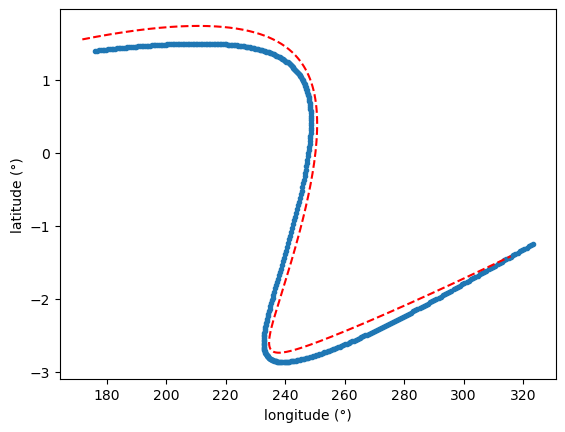

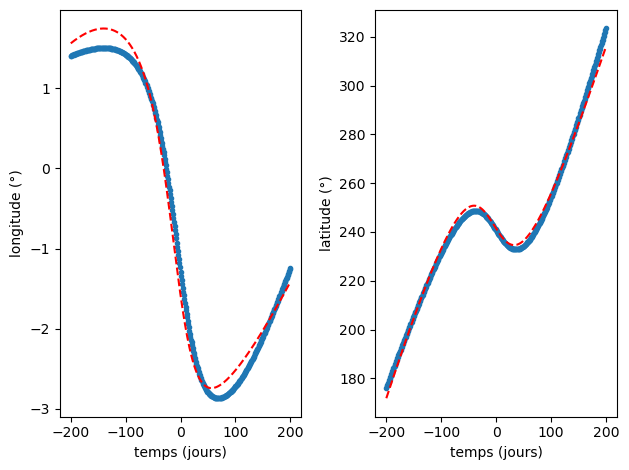

In [22]:
days,calclong,calclatt=Orbits(angles)

datenum=date-np.datetime64('2016-05-25')
datenum=datenum.astype(int)
mask1=datenum>=days[0]
mask2=datenum<=days[-1]
mask=mask1*mask2
plt.plot(longitude[mask],latitude[mask],".")
plt.plot(calclong,calclatt,'--r')
plt.xlabel("longitude (°)")
plt.ylabel("latitude (°)")
plt.show()
fig, axs=plt.subplots(1,2)
axs[0].plot(datenum[mask],latitude[mask],'.')
axs[0].plot(days,calclatt,"--r")
axs[0].set_xlabel("temps (jours)")
axs[0].set_ylabel("longitude (°)")              
axs[1].plot(datenum[mask],longitude[mask],'.')
axs[1].plot(days,calclong,"--r")
axs[1].set_xlabel("temps (jours)")
axs[1].set_ylabel("latitude (°)")
plt.tight_layout()
plt.show()


On colle raisonnablement bien en longitude et latitude... mais ça reste imparfait. 